# OECD Data

In [57]:
from utils.oecd import get_oecd_data
import matplotlib.pyplot as plt

## Agregados monetarios

In [58]:
id = "OECD.SDD.STES,DSD_STES@DF_MONAGG,4.0/.A......."

df = get_oecd_data(id)

print(f"{df["MEASURE"].unique() = }")
print(f"{df["REF_AREA"].unique() = }")

df

df["MEASURE"].unique() = array(['MANM', 'MABM'], dtype=object)
df["REF_AREA"].unique() = array(['JPN', 'AUS', 'CAN', 'COL', 'CRI', 'CZE', 'HUN', 'ISR', 'KOR',
       'NOR', 'GBR', 'USA', 'EA19', 'OECD', 'OECDE', 'BRA', 'RUS', 'ZAF',
       'ISL', 'CHL', 'DNK', 'MEX', 'NZL', 'POL', 'SWE', 'CHE', 'TUR',
       'BGR', 'CHN', 'IND', 'IDN', 'ROU'], dtype=object)


,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
TIME_PERIOD,,,,,,,,,,,,,,,
1955-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),JPN,A,MANM,IX,_Z,Y,_Z,_Z,N,0.372299,A,0,2,2015.0
1956-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),JPN,A,MANM,IX,_Z,Y,_Z,_Z,N,0.424722,A,0,2,2015.0
1957-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),JPN,A,MANM,IX,_Z,Y,_Z,_Z,N,0.478435,A,0,2,2015.0
1958-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),JPN,A,MANM,IX,_Z,Y,_Z,_Z,N,0.505580,A,0,2,2015.0
1959-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),JPN,A,MANM,IX,_Z,Y,_Z,_Z,N,0.588486,A,0,2,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),USA,A,MABM,IX,_Z,Y,_Z,_Z,N,146.534300,A,0,2,2015.0
2021-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),USA,A,MABM,IX,_Z,Y,_Z,_Z,N,170.166700,A,0,2,2015.0
2022-01-01,OECD.SDD.STES:DSD_STES@DF_MONAGG(4.0),USA,A,MABM,IX,_Z,Y,_Z,_Z,N,178.912300,A,0,2,2015.0


In [59]:
# Dos posibilidades para filtrar:
# df = df[(df["MEASURE"]=="MANM") & (df["REF_AREA"]=="USA") & (df["UNIT_MEASURE"]=="IX")].sort_index()
df = df.query("MEASURE=='MABM' & REF_AREA in ['JPN', 'USA', 'AUS'] & UNIT_MEASURE=='IX'")

df_ = df[["REF_AREA", "OBS_VALUE"]].sort_index()
df_

,REF_AREA,OBS_VALUE
TIME_PERIOD,,
1959-01-01,USA,2.432741
1960-01-01,USA,2.523841
1961-01-01,USA,2.694291
1961-01-01,AUS,0.415296
1962-01-01,USA,2.903862
...,...,...
2023-01-01,USA,172.733600
2023-01-01,AUS,161.689500
2024-01-01,AUS,170.416700


In [60]:
df_.pivot(columns="REF_AREA", values="OBS_VALUE")

REF_AREA,AUS,JPN,USA
TIME_PERIOD,,,
1959-01-01,NaN,NaN,2.432741
1960-01-01,NaN,NaN,2.523841
1961-01-01,0.415296,NaN,2.694291
1962-01-01,0.445817,NaN,2.903862
1963-01-01,0.484529,NaN,3.148615
...,...,...,...
2020-01-01,129.750300,117.1701,146.534300
2021-01-01,141.253400,123.6552,170.166700
2022-01-01,153.452200,127.2694,178.912300


<Axes: title={'center': 'Agregado monetario M1'}, xlabel='Año', ylabel='Índice (2015=100)'>

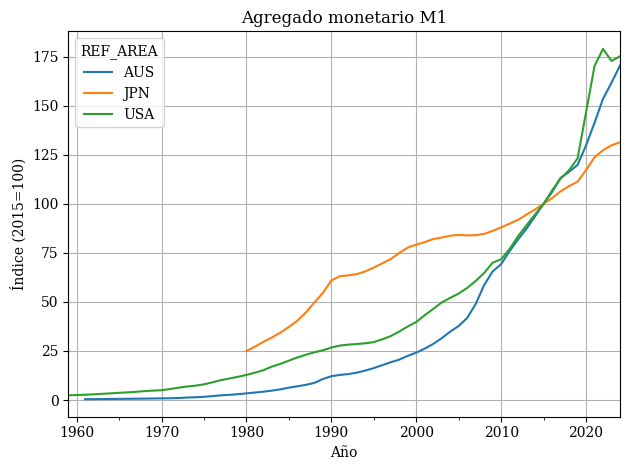

In [61]:
df_.pivot(columns="REF_AREA", values="OBS_VALUE").plot(title='Agregado monetario M1', xlabel='Año', ylabel='Índice (2015=100)')

## Gasto en pensiones públicas


### Porcentaje del PIB

OECD. [Public expenditure on old-age and survivors cash benefits in % GDP](https://data-explorer.oecd.org/vis?lc=en&df[ds]=DisseminateFinalDMZ&df[id]=DSD_SOCX_AGG%40DF_PUB_OLD&df[ag]=OECD.ELS.SPD&df[vs]=1.0&dq=.A..PT_B1GQ....&pd=%2C&to[TIME_PERIOD]=false&vw=tb)

In [62]:
id = "OECD.ELS.SPD,DSD_SOCX_AGG@DF_PUB_OLD,1.0/.A..PT_B1GQ...."

df = get_oecd_data(id)[["OBS_VALUE", "REF_AREA"]]
df

,OBS_VALUE,REF_AREA
TIME_PERIOD,,
1981-01-01,NaN,AUT
1982-01-01,NaN,AUT
1983-01-01,NaN,AUT
1984-01-01,NaN,AUT
1986-01-01,NaN,AUT
...,...,...
2017-01-01,7.908,ROU
2018-01-01,7.740,ROU
2019-01-01,7.682,ROU


<Axes: title={'center': 'Gasto en pensiones públicas'}, ylabel='% del PIB'>

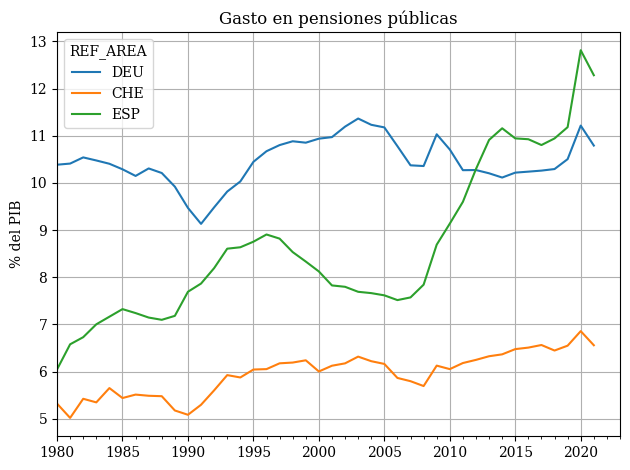

In [63]:
df.pivot_table(
    index="TIME_PERIOD",
    columns="REF_AREA",
    values="OBS_VALUE"
).plot(y=['DEU', 'CHE', 'ESP'], title='Gasto en pensiones públicas', ylabel='% del PIB', xlabel='')

## Porcentaje del gasto público

<Axes: title={'center': 'Gasto en pensiones públicas'}, ylabel='% del gasto público'>

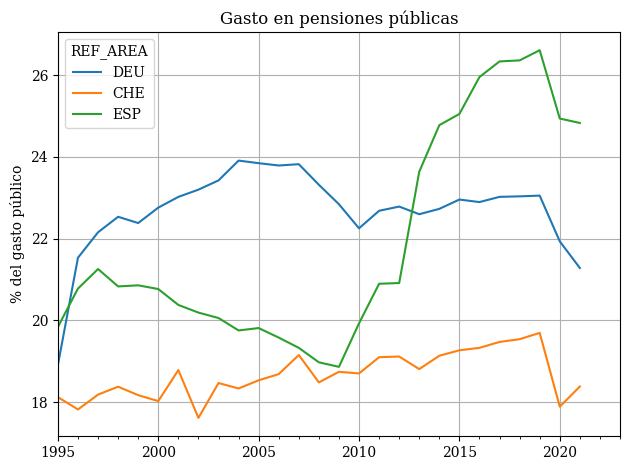

In [64]:
id = "OECD.ELS.SPD,DSD_SOCX_AGG@DF_PUB_OLD,1.0/.A..PT_OTE_S13...."

df = get_oecd_data(id)[["OBS_VALUE", "REF_AREA"]]

df.pivot_table(
    index="TIME_PERIOD",
    columns="REF_AREA",
    values="OBS_VALUE"
).plot(y=['DEU', 'CHE', 'ESP'], title='Gasto en pensiones públicas', ylabel='% del gasto público', xlabel='', xlim=['1995', None])

## Valor presente de las pensiones

OECD. [Pension wealth](https://data-explorer.oecd.org/vis?lc=en&tm=pension&pg=0&snb=177&vw=ov&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_PAG%40DF_PW&df[ag]=OECD.ELS.SPD&df[vs]=1.0&dq=.A.....&pd=2022%2C2022&to[TIME_PERIOD]=true&isAvailabilityDisabled=false)

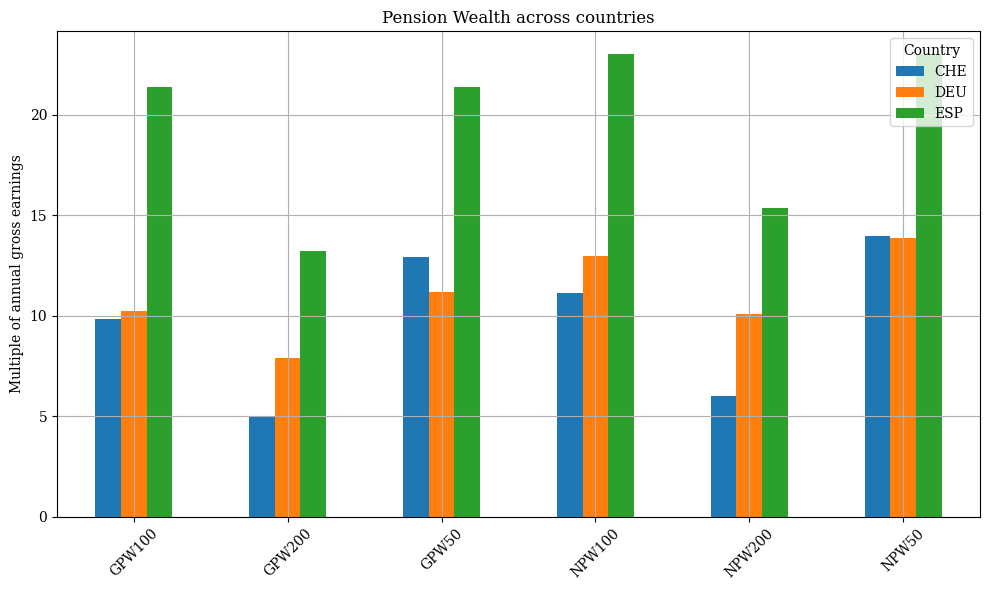

In [65]:
id = "OECD.ELS.SPD,DSD_PAG@DF_PW,1.0/.A....."

df = get_oecd_data(id)[["OBS_VALUE", "REF_AREA", "SEX", "MEASURE"]]

# Average by sex
df_avg = df.groupby(["REF_AREA", "MEASURE"], as_index=False)["OBS_VALUE"].mean()

pivot_df = df_avg.loc[df_avg['REF_AREA'].isin(['ESP', 'CHE', 'DEU'])].pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE")

# Make grouped bar chart
ax = pivot_df[["CHE", "DEU", "ESP"]].plot(kind="bar", figsize=(10,6))
plt.title("Pension Wealth across countries")
plt.ylabel("Multiple of annual gross earnings")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.tight_layout()
plt.show()

In [66]:
pivot_df.loc[['GPW50', 'GPW100', 'GPW200']].reset_index()

REF_AREA,MEASURE,CHE,DEU,ESP
0,GPW50,12.90,11.20,21.4
1,GPW100,9.85,10.25,21.4
2,GPW200,5.00,7.90,13.2


## Pensions at a Glance

Dataset [Pensions at a Glance](https://data-explorer.oecd.org/vis?df[ds]=DisseminateFinalDMZ&df[id]=DSD_PAG%40DF_PAG&df[ag]=OECD.ELS.SPD&dq=.A.GPRR100....&pd=2019%2C2022&to[TIME_PERIOD]=true&vw=tb&lb=nm)

In [67]:
id = 'OECD.ELS.SPD,DSD_PAG@DF_PAG,/.A.....'

df = get_oecd_data(id)#[["OBS_VALUE", "REF_AREA", "SEX", "MEASURE"]]

In [68]:
df = df.query('MEASURE in ["GPRR50", "GPRR100", "GPRR200"] & REF_AREA in ["CHE", "DEU", "ESP"] & OPTIONALITY=="M"')
df_avg = df.groupby(["REF_AREA", "MEASURE"], as_index=False)["OBS_VALUE"].mean()
df_avg

,REF_AREA,MEASURE,OBS_VALUE
0,CHE,GPRR100,39.9
1,CHE,GPRR200,20.3
2,CHE,GPRR50,52.2
3,DEU,GPRR100,43.9
4,DEU,GPRR200,33.7
5,DEU,GPRR50,47.8
6,ESP,GPRR100,80.4
7,ESP,GPRR200,49.6
8,ESP,GPRR50,80.4


In [69]:
pivot_df = df_avg.pivot(index="MEASURE", columns="REF_AREA", values="OBS_VALUE")
pivot_df

REF_AREA,CHE,DEU,ESP
MEASURE,,,
GPRR100,39.9,43.9,80.4
GPRR200,20.3,33.7,49.6
GPRR50,52.2,47.8,80.4


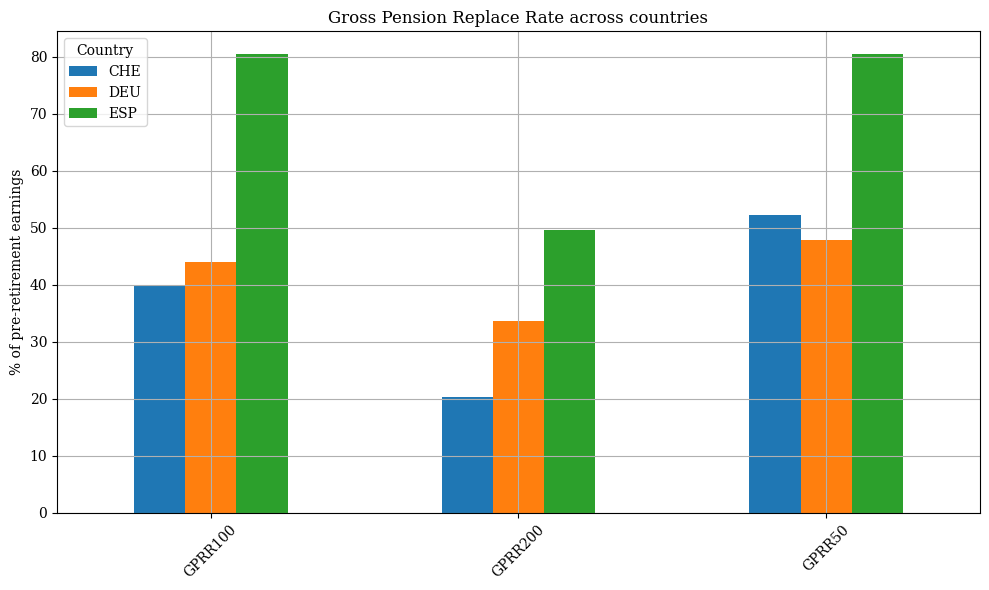

In [70]:
ax = pivot_df[["CHE", "DEU", "ESP"]].plot(kind="bar", figsize=(10,6))
plt.title("Gross Pension Replace Rate across countries")
plt.ylabel(r"% of pre-retirement earnings")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.tight_layout()
plt.show()